In [1]:
import numpy as np
import pandas as pd

In [2]:
N = np.log([324e+6, 896e+6, 1300e+6])
L = np.log([1.21, .975, .964])

df = pd.DataFrame([L,N]).T
df.index = N

In [3]:
df[0]

19.596254    0.190620
20.613451   -0.025318
20.985630   -0.036664
Name: 0, dtype: float64

In [4]:
from scipy.optimize import curve_fit

# Define the linear function
def linear_function(x, a, b):
    return a * x + b

# Sample data
x_data = N
y_data = L

# Perform the linear fit
popt, pcov = curve_fit(linear_function, x_data, y_data)

# Extract the optimal parameters
a_optimal, b_optimal = popt

# Calculate the standard errors of the parameters
a_error, b_error = np.sqrt(np.diag(pcov))

alpha = -a_optimal
Nc = np.exp(b_optimal/-a_optimal)
Nc_error = np.sqrt( b_error**2 * (Nc/a_optimal)**2 + a_error**2 * (b_optimal*Nc)**2)

# Print the results
print("Optimal parameters: \n")
print(f"a = {a_optimal:.5f} +/- {a_error:.5f}")
print("b =", b_optimal, "+/-", b_error)
print()
print(f"alpha = {alpha:.5f} +/- {a_error:.5f}")
print(f"Nc = {Nc:.4e} +/- {Nc_error:.4e}")

Optimal parameters: 

a = -0.17388 +/- 0.03841
b = 3.58981819247838 +/- 0.783845843293635

alpha = 0.17388 +/- 0.03841
Nc = 9.2476e+08 +/- 4.1707e+09


<Axes: >

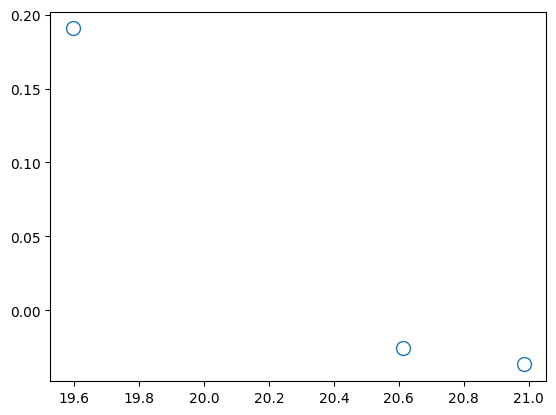

In [5]:
df[0].plot(linestyle='none',marker='o',fillstyle='none',markersize=10,legend=None)